In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Read cleaned dataset into a dataframe

df = pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


## Data cleaning

In [4]:
# Drop extraneous columns

df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


In [5]:
# Fill null values

pd.isnull(df).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [6]:
df = df.fillna(0)
pd.isnull(df).sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

## EDA

In [7]:
# Visualize correlation between features and MVP vote share

corr = df.select_dtypes(include=['number']).corr()[['Share']]
corr

,Share
Age,0.018596
G,0.089282
GS,0.167476
MP,0.162175
FG,0.276365
FGA,0.249254
FG%,0.064901
3P,0.096225
3PA,0.096460
3P%,0.030621


<Axes: >

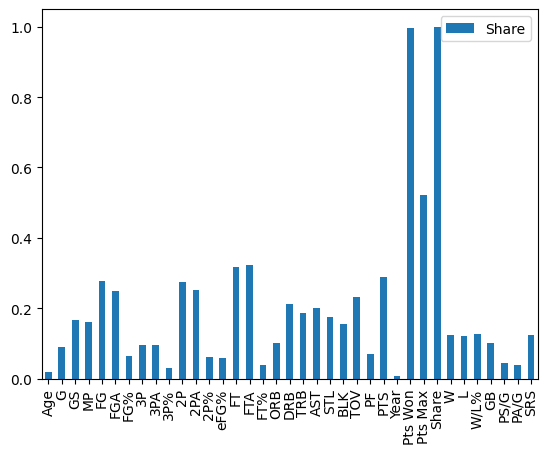

In [8]:
corr.abs().plot.bar()

<Axes: >

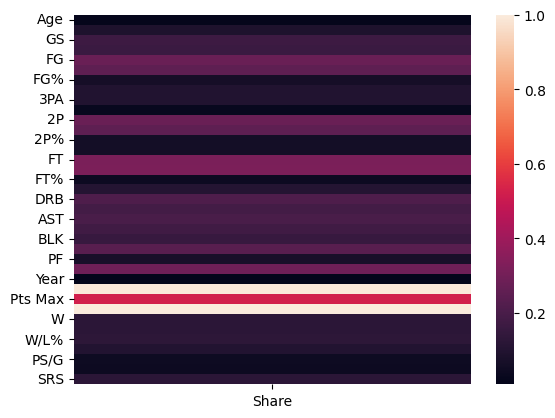

In [9]:
sns.heatmap(corr.abs())

## Machine learning modeling

In [43]:
# Select features

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

In [11]:
# Split training and testing data

train = df[df['Year'] < 2021]
test = df[df['Year'] == 2021]

In [12]:
# Import ridge regression

from sklearn.linear_model import Ridge

In [13]:
# Train the model

model = Ridge(alpha=0.1)
model.fit(train[predictors], train['Share'])

Ridge(alpha=0.1)

In [14]:
# Predict testing data

predictions = model.predict(test[predictors])

In [15]:
predictions = pd.DataFrame(predictions, columns=['Prediction'], index=test.index)
predictions

,Prediction
630,0.013567
631,-0.013756
632,0.002414
633,-0.004421
634,0.010734
...,...
13897,-0.012571
13898,-0.011575
13899,0.016424
13900,-0.020434


## Error exploration

In [16]:
# Create prediction dataframe

predictions = pd.concat([test[['Player', 'Share']], predictions], axis=1)
predictions = predictions.sort_values('Share', ascending=False)
predictions

,Player,Share,Prediction
641,Nikola Jokić,0.961,0.154307
8624,Joel Embiid,0.580,0.162713
3651,Stephen Curry,0.449,0.142386
9907,Giannis Antetokounmpo,0.345,0.207436
1389,Chris Paul,0.138,0.072294
...,...,...,...
4171,Chris Chiozza,0.000,0.007047
4170,Bruce Brown,0.000,0.003656
4169,Blake Griffin,0.000,0.011746
4168,Andre Roberson,0.000,-0.026907


In [17]:
# Assign actual and predicted rankings

predictions['Rank'] = range(1, len(predictions) + 1)
predictions

,Player,Share,Prediction,Rank
641,Nikola Jokić,0.961,0.154307,1
8624,Joel Embiid,0.580,0.162713,2
3651,Stephen Curry,0.449,0.142386,3
9907,Giannis Antetokounmpo,0.345,0.207436,4
1389,Chris Paul,0.138,0.072294,5
...,...,...,...,...
4171,Chris Chiozza,0.000,0.007047,536
4170,Bruce Brown,0.000,0.003656,537
4169,Blake Griffin,0.000,0.011746,538
4168,Andre Roberson,0.000,-0.026907,539


In [18]:
predictions = predictions.sort_values('Prediction', ascending=False)
predictions['Prediction_Rank'] = range(1, len(predictions) + 1)
predictions = predictions.sort_values('Rank')
predictions.head(5)

,Player,Share,Prediction,Rank,Prediction_Rank
641,Nikola Jokić,0.961,0.154307,1,3
8624,Joel Embiid,0.580,0.162713,2,2
3651,Stephen Curry,0.449,0.142386,3,6
9907,Giannis Antetokounmpo,0.345,0.207436,4,1
1389,Chris Paul,0.138,0.072294,5,33


In [19]:
# Find error by avergaing the squared distance of a finalist's
# predicted rank from the top five

def find_error(predictions):
    actual = predictions.head(5)
    total_error = 0

    for index, row in actual.iterrows():
        if row['Prediction_Rank'] > 5:
            total_error += (row['Prediction_Rank'] - 5) ** 2
        
    MSE = total_error / 5
    return MSE

In [20]:
find_error(predictions)

157.0

## Backtesting

In [21]:
years = list(range(1991, 2022))

In [40]:
# Back test the model on all years after 1996

def backtest(df, years, model, predictors):
    error_b = 0
    counter = 0
    all_predictions = []
    
    for year in years[5:]:
        train_b = df[df['Year'] < year]
        test_b = df[df['Year'] == year]
        model.fit(train_b[predictors], train_b['Share'])

        predictions_b = model.predict(test_b[predictors])
        predictions_b = pd.DataFrame(predictions_b, columns=['Prediction'], index=test_b.index)
        predictions_b = pd.concat([test_b[['Player', 'Share']], predictions_b], axis=1)
        predictions_b = predictions_b.sort_values('Share', ascending=False)
        predictions_b['Rank'] = range(1, len(predictions_b) + 1)
        predictions_b = predictions_b.sort_values('Prediction', ascending=False)
        predictions_b['Prediction_Rank'] = range(1, len(predictions_b) + 1)
        predictions_b = predictions_b.sort_values('Rank')

        all_predictions.append(predictions_b)
        error_b += find_error(predictions_b)
        counter += 1
    
    return (error_b / counter), pd.concat(all_predictions)

In [44]:
error, all_predictions = backtest(df, years, model, predictors)
error

96.25384615384615

## Model tuning

In [45]:
# Select new features to minimize backtesting error

predictors_new = ['G', 'GS', 'MP', 'FG', 'FGA',
       '3PA', '2P', '2PA', 'eFG%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

In [46]:
error, all_predictions = backtest(df, years, model, predictors_new)
error

59.338461538461544

In [62]:
# Convert team and position into numerical dummy variables

df['Num_Pos'] = df['Pos'].astype('category').cat.codes
df['Num_Tm'] = df['Tm'].astype('category').cat.codes
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Num_Pos,Num_Tm
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,2,15
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,12,15
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,2,15
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,2,15
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73,8,15


In [63]:
# Add new features to list of predictors

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'Num_Pos', 'Num_Tm']

In [64]:
# Import random forest model

from sklearn.ensemble import RandomForestRegressor

In [65]:
# Create randon forest model

rf = RandomForestRegressor(n_estimators=300, random_state=1, min_samples_split=5)

In [66]:
# Find backtesting error of new model

error, all_predictions = backtest(df, years, rf, predictors)

In [69]:
error

31.569230769230767

## Predictions
Predict 2022 MVP finalists using the tuned model and full dataset.

In [89]:
# Import 2022 season data

df_2022 = pd.read_csv('stats_2022.csv')
df_2022

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


### Cleaning

In [90]:
# Remove extraneous columns

df_2022 = df_2022.drop('Rk', axis=1)
df_2022.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [91]:
# Add year column

df_2022['Year'] = 2022
df_2022.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,2022
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,2022
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,2022
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,2022
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,2022


In [92]:
# Isolate players associated with multiple teams in one year

df_2022 = df_2022.groupby(['Player'])

In [93]:
# Reduce multi-team players to an aggregate row for a single year

def TotalStats(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df['Tm'] == 'TOT']
        row['Tm'] = df.iloc[-1,3]
        return row
    
df_2022 = df_2022.apply(TotalStats)

In [94]:
# Drop extra index

df_2022.index = df_2022.index.droplevel()
df_2022

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
223,A.J. Green,SG,23,MIL,35,1,9.9,1.5,3.6,0.424,...,0.2,1.1,1.3,0.6,0.2,0.0,0.3,0.9,4.4,2022
361,A.J. Lawson,SG,22,DAL,15,0,7.2,1.5,2.9,0.500,...,0.4,1.0,1.4,0.1,0.1,0.0,0.2,0.7,3.7,2022
233,AJ Griffin,SF,19,ATL,72,12,19.5,3.4,7.4,0.465,...,0.5,1.6,2.1,1.0,0.6,0.2,0.6,1.2,8.9,2022
214,Aaron Gordon,PF,27,DEN,68,68,30.2,6.3,11.2,0.564,...,2.4,4.1,6.6,3.0,0.8,0.8,1.4,1.9,16.3,2022
272,Aaron Holiday,PG,26,ATL,63,6,13.4,1.5,3.5,0.418,...,0.4,0.8,1.2,1.4,0.6,0.2,0.6,1.3,3.9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Zach Collins,C,25,SAS,63,26,22.9,4.5,8.7,0.518,...,1.8,4.5,6.4,2.9,0.6,0.8,2.0,3.2,11.6,2022
360,Zach LaVine,SG,27,CHI,77,77,35.9,8.7,18.0,0.485,...,0.5,3.9,4.5,4.2,0.9,0.2,2.5,2.1,24.8,2022
457,Zeke Nnaji,PF,22,DEN,53,5,13.7,2.1,3.7,0.561,...,1.2,1.4,2.6,0.3,0.3,0.4,0.6,2.0,5.2,2022
663,Ziaire Williams,SF,21,MEM,37,4,15.2,2.3,5.3,0.429,...,0.4,1.7,2.1,0.9,0.4,0.2,1.0,1.6,5.7,2022


In [95]:
pd.isnull(df_2022).sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Year      0
dtype: int64

### Modeling

In [98]:
# Modify features to fit testing data

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Num_Pos', 'Num_Tm']

In [99]:
# Fit random forest model to training data

rf.fit(df[predictors_2022], df['Share'])

RandomForestRegressor(min_samples_split=5, n_estimators=300, random_state=1)

In [155]:
predictions_2022 = rf.predict(df_2022[predictors_2022])

In [156]:
# Visualize predictions in dataframe

predictions_2022 = pd.DataFrame(predictions_2022, columns=['Prediction'], index=df_2022.index)
predictions_2022 = pd.concat([df_2022[['Player']], predictions_2022], axis=1)
predictions_2022 = predictions_2022.sort_values('Prediction', ascending=False)
predictions_2022

,Player,Prediction
12,Giannis Antetokounmpo,0.568371
184,Joel Embiid,0.507041
160,Luka Doncic,0.481241
318,Nikola Jokic,0.398064
174,Kevin Durant,0.366865
...,...,...
414,JaVale McGee,0.000000
229,JaMychal Green,0.000000
599,JT Thor,0.000000
144,JD Davison,0.000000


In [157]:
# Assign prediction ranks

predictions_2022['Prediction_Rank'] = range(1, len(predictions_2022) + 1)
predictions_2022

,Player,Prediction,Prediction_Rank
12,Giannis Antetokounmpo,0.568371,1
184,Joel Embiid,0.507041,2
160,Luka Doncic,0.481241,3
318,Nikola Jokic,0.398064,4
174,Kevin Durant,0.366865,5
...,...,...,...
414,JaVale McGee,0.000000,535
229,JaMychal Green,0.000000,536
599,JT Thor,0.000000,537
144,JD Davison,0.000000,538


In [158]:
# Manually assign real ranks

predictions_2022 = predictions_2022.loc[[12, 184, 318, 209, 590]]
predictions_2022['Rank'] = [3, 1, 2, 5, 4]
predictions_2022.sort_values('Rank')

,Player,Prediction,Prediction_Rank,Rank
184,Joel Embiid,0.507041,2,1
318,Nikola Jokic,0.398064,4,2
12,Giannis Antetokounmpo,0.568371,1,3
590,Jayson Tatum,0.342690,7,4
209,Shai Gilgeous-Alexander,0.363287,6,5


In [160]:
# Find model error

find_error(predictions_2022)

1.0